### Part 1 ‐ Exploratory data analysis
The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15­minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

In [4]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [10]:
# import data
df_login = pd.read_json('/Users/monikakrajnc/Desktop/Python_&_R_projects/Springboard/Unit_17_Effective_Interviewing/Unit_17.2_Take_home_challenge/Challenge_Ultimate_technologies/ultimate_challenge/logins.json')

In [11]:
# print first few rows
df_login.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [16]:
# print last few rows
df_login.tail()

,login_time
93137,1970-04-13 18:50:19
93138,1970-04-13 18:43:56
93139,1970-04-13 18:54:02
93140,1970-04-13 18:57:38
93141,1970-04-13 18:54:23


In [12]:
# print shape of the dataframe
df_login.shape

(93142, 1)

In [13]:
# print information of the dataframe
df_login.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


Aggregate these login counts based on 15­minute time intervals.

In [17]:
# sort values, since they are not in order
df_login = df_login.sort_values(by='login_time', ascending=True)

In [18]:
# check if it was sorted correctly
df_login.head(10)

,login_time
6,1970-01-01 20:12:16
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
3,1970-01-01 20:16:36
2,1970-01-01 20:16:37
5,1970-01-01 20:21:41
10,1970-01-01 20:26:05
4,1970-01-01 20:26:21
11,1970-01-01 20:31:03
12,1970-01-01 20:34:46


In [19]:
# check if it was sorted correctly
df_login.tail(10)

,login_time
93133,1970-04-13 18:40:31
93135,1970-04-13 18:40:40
93131,1970-04-13 18:43:19
93138,1970-04-13 18:43:56
93134,1970-04-13 18:46:06
93136,1970-04-13 18:48:52
93137,1970-04-13 18:50:19
93139,1970-04-13 18:54:02
93141,1970-04-13 18:54:23
93140,1970-04-13 18:57:38


In [20]:
# create a copy
import copy
df_login_copy = df_login.copy()

In [27]:
df_agg_15m = df_login_copy.groupby(df_login_copy.login_time.dt.floor('15T')).count()
#df_login_copy.groupby(df_login_copy.login_time.dt.floor(''),'ID']).agg(['mean','sum', 'max'])
df_agg_15m

,login_time
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1
1970-01-01 21:15:00,4
1970-01-01 21:45:00,4
1970-01-01 22:00:00,9
1970-01-01 22:15:00,8


In [30]:
# rename the column
df_agg_15m = df_agg_15m.rename(columns={'login_time': 'count'})

In [32]:
# change index into column
df_agg_15m['login_time'] = df_agg_15m.index

In [35]:
# reset the index
df_agg_15m_2 = df_agg_15m.reset_index(drop=True)

In [36]:
df_agg_15m_2

,count,login_time
0,2,1970-01-01 20:00:00
1,6,1970-01-01 20:15:00
2,9,1970-01-01 20:30:00
3,7,1970-01-01 20:45:00
4,1,1970-01-01 21:00:00
5,4,1970-01-01 21:15:00
6,4,1970-01-01 21:45:00
7,9,1970-01-01 22:00:00
8,8,1970-01-01 22:15:00
9,1,1970-01-01 22:30:00


Visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand.

In [38]:
df_agg_15m_2.describe()

,count
count,9381.000000
mean,9.928792
std,8.263146
min,1.000000
25%,4.000000
50%,8.000000
75%,14.000000
max,73.000000


In [41]:
df_agg_15m_2[df_agg_15m_2['count'] < 9].count()

count         5110
login_time    5110
dtype: int64

In [43]:
df_agg_15m_2[df_agg_15m_2['count'] < 9]

,count,login_time
0,2,1970-01-01 20:00:00
1,6,1970-01-01 20:15:00
3,7,1970-01-01 20:45:00
4,1,1970-01-01 21:00:00
5,4,1970-01-01 21:15:00
6,4,1970-01-01 21:45:00
8,8,1970-01-01 22:15:00
9,1,1970-01-01 22:30:00
10,3,1970-01-01 22:45:00
20,8,1970-01-02 01:15:00


In [42]:
df_agg_15m_2[df_agg_15m_2['count'] >= 9].count()

count         4271
login_time    4271
dtype: int64

In [44]:
df_agg_15m_2[df_agg_15m_2['count'] >= 9]

,count,login_time
2,9,1970-01-01 20:30:00
7,9,1970-01-01 22:00:00
11,16,1970-01-01 23:00:00
12,13,1970-01-01 23:15:00
13,14,1970-01-01 23:30:00
14,15,1970-01-01 23:45:00
15,10,1970-01-02 00:00:00
16,18,1970-01-02 00:15:00
17,12,1970-01-02 00:30:00
18,13,1970-01-02 00:45:00


In [45]:
#convert from string to datetime
df_agg_15m_2['date'] = pd.to_datetime(df_agg_15m_2['login_time']) 

In [55]:
df_agg_15m_2.head()

,count,login_time,date,time,weekday,weekday_name
0,2,1970-01-01 20:00:00,1970-01-01,20:00:00,3,Thursday
1,6,1970-01-01 20:15:00,1970-01-01,20:15:00,3,Thursday
2,9,1970-01-01 20:30:00,1970-01-01,20:30:00,3,Thursday
3,7,1970-01-01 20:45:00,1970-01-01,20:45:00,3,Thursday
4,1,1970-01-01 21:00:00,1970-01-01,21:00:00,3,Thursday


In [47]:
# create a column with date only
df_agg_15m_2['date'] = df_agg_15m_2['date'].dt.date

In [49]:
# create a column with time only
df_agg_15m_2['time'] = pd.to_datetime(df_agg_15m_2['login_time']).dt.time 

In [52]:
# create new column by extracting day of the week
df_agg_15m_2['weekday'] = pd.to_datetime(df_agg_15m_2['login_time']).apply(lambda x: x.weekday())

In [54]:
# create new column by extracting day of the week by name
df_agg_15m_2['weekday_name'] = pd.to_datetime(df_agg_15m_2['login_time']).apply(lambda x: x.day_name())

In [59]:
# group by date and sum the count column
date_sum = df_agg_15m_2.groupby(['date', 'weekday_name'])['count'].sum()
date_sum

date        weekday_name
1970-01-01  Thursday         112
1970-01-02  Friday           681
1970-01-03  Saturday         793
1970-01-04  Sunday           788
1970-01-05  Monday           459
                            ... 
1970-04-09  Thursday         818
1970-04-10  Friday          1009
1970-04-11  Saturday        1352
1970-04-12  Sunday          1409
1970-04-13  Monday           395
Name: count, Length: 103, dtype: int64

In [60]:
date_sum.sort_values(ascending=False)

date        weekday_name
1970-04-04  Saturday        1889
1970-03-14  Saturday        1706
1970-03-07  Saturday        1666
1970-03-15  Sunday          1565
1970-03-29  Sunday          1523
                            ... 
1970-02-03  Tuesday          464
1970-01-26  Monday           462
1970-01-05  Monday           459
1970-04-13  Monday           395
1970-01-01  Thursday         112
Name: count, Length: 103, dtype: int64

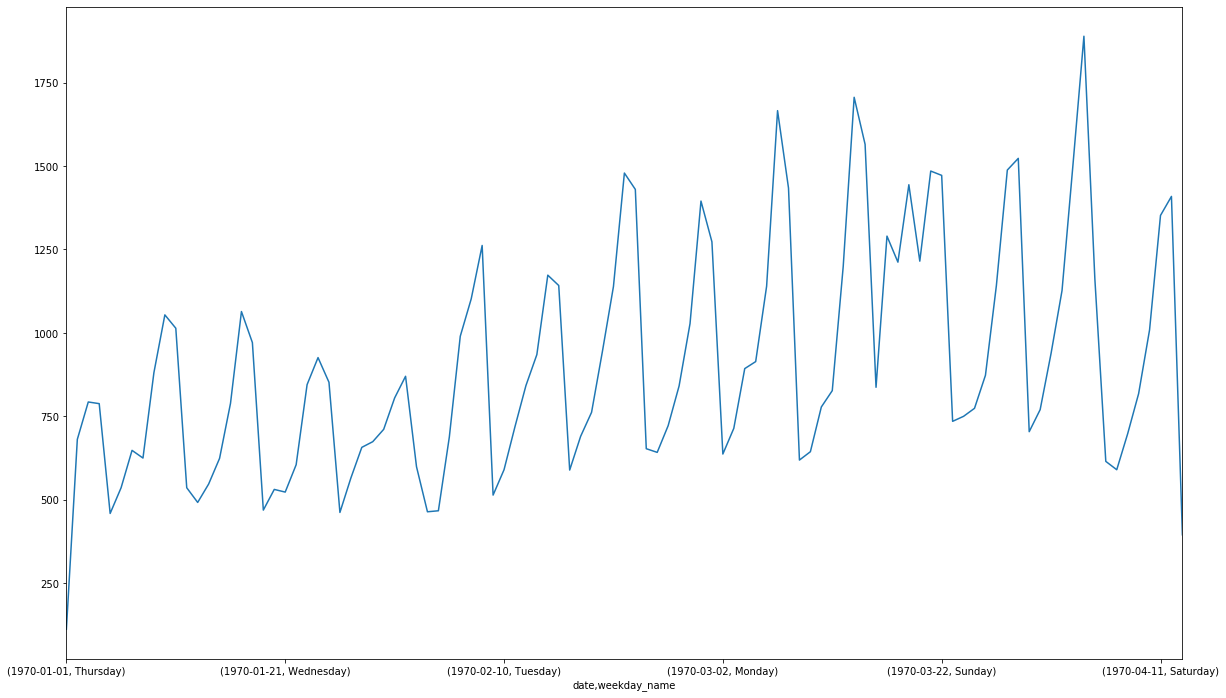

In [63]:
plt.figure(figsize=(20,12))
date_sum.plot()
plt.show()

We can notice that the graph has a specific pattern. Another thing we can notice is that in March and April there are higher values then in January and February, which are colder months with shorter days (but depends on hemisphere).

Let's check values for days:

In [71]:
# check the last 15 values
date_sum.sort_values(ascending=False).tail(15)

date        weekday_name
1970-01-27  Tuesday         565
1970-01-14  Wednesday       547
1970-01-12  Monday          536
1970-01-06  Tuesday         536
1970-01-20  Tuesday         531
1970-01-21  Wednesday       523
1970-02-09  Monday          514
1970-01-13  Tuesday         492
1970-01-19  Monday          469
1970-02-04  Wednesday       467
1970-02-03  Tuesday         464
1970-01-26  Monday          462
1970-01-05  Monday          459
1970-04-13  Monday          395
1970-01-01  Thursday        112
Name: count, dtype: int64

There are 8 days that have login counts less than 500. Four times it’s Monday, two times it’s Tuesday. Wednesday and Thursday both have just 1 value less than 500. From this we can assume that on Monday the number of users who log in is the smallest in a particular geographic location. If we only look at the valleys in the graph, we can assume that the beginning of the week (Monday and Tuesday) is the least popular time.

By looking at the graph we can see there are few values higher than 1500. Let's check the days:

In [73]:
# check the first 20 values
date_sum.sort_values(ascending=False).head(20)

date        weekday_name
1970-04-04  Saturday        1889
1970-03-14  Saturday        1706
1970-03-07  Saturday        1666
1970-03-15  Sunday          1565
1970-03-29  Sunday          1523
1970-04-03  Friday          1504
1970-03-28  Saturday        1488
1970-03-21  Saturday        1485
1970-02-21  Saturday        1479
1970-03-22  Sunday          1472
1970-03-19  Thursday        1444
1970-03-08  Sunday          1434
1970-02-22  Sunday          1430
1970-04-12  Sunday          1409
1970-02-28  Saturday        1395
1970-04-11  Saturday        1352
1970-03-17  Tuesday         1290
1970-03-01  Sunday          1273
1970-02-08  Sunday          1262
1970-03-20  Friday          1215
Name: count, dtype: int64

There are 6 days when the login count is greater than 1500, 3 times on Saturday, 2 times on Sunday and once on Friday. Looking at these values we can see that weekends have the highest user login count.

Now, let's check if we can find some patterns from the time column.

In [76]:
# group by time and sum the count column
time_sum = df_agg_15m_2.groupby('time')['count'].sum()
time_sum

time
00:00:00    1439
00:15:00    1547
00:30:00    1525
00:45:00    1482
01:00:00    1549
            ... 
22:45:00    1637
23:00:00    1573
23:15:00    1552
23:30:00    1456
23:45:00    1477
Name: count, Length: 96, dtype: int64

In [78]:
time_sum.describe()

count      96.000000
mean      970.229167
std       455.485640
min       175.000000
25%       690.750000
50%       899.500000
75%      1404.000000
max      1684.000000
Name: count, dtype: float64

Notice there is a huge difference between minimum and maximum. Let's plot all values.

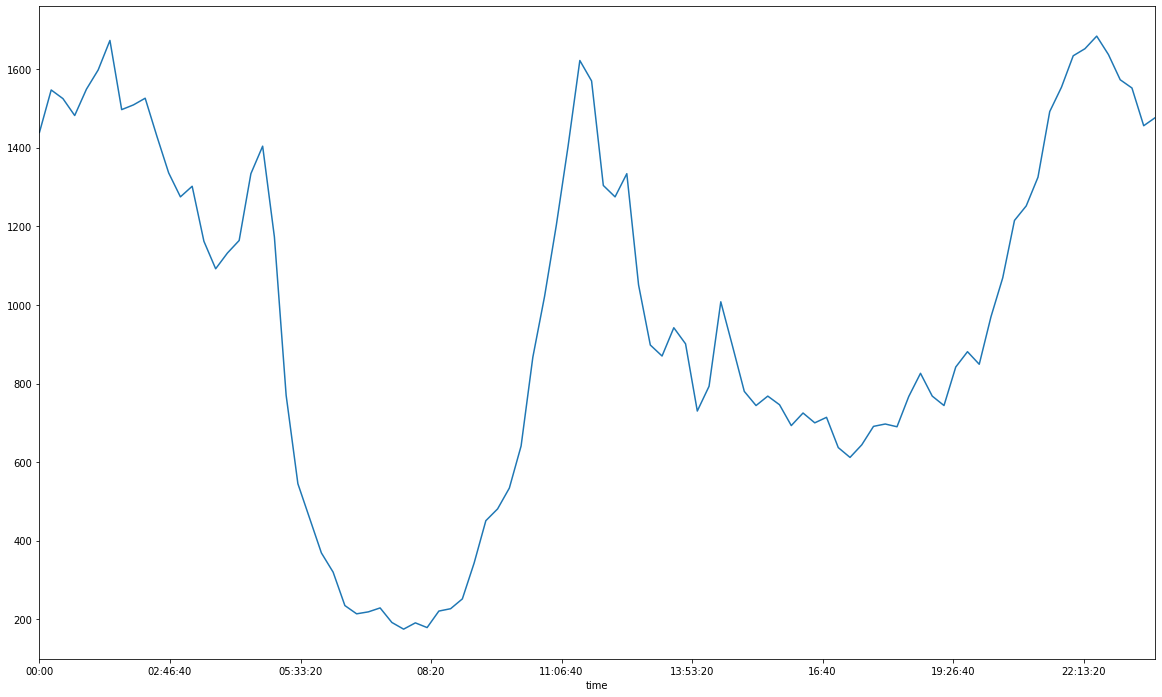

In [77]:
plt.figure(figsize=(20,12))
time_sum.plot()
plt.show()

This graph is very interesting. We can see that there is one very low point at around 8am and another one around 5pm. One peak is between 22pm and 1am and another one between 11am and 12pm.

In [79]:
time_sum.sort_values(ascending=False).tail(20)

time
17:15:00    612
05:30:00    545
10:00:00    534
09:45:00    481
05:45:00    457
09:30:00    451
06:00:00    369
09:15:00    343
06:15:00    320
09:00:00    252
06:30:00    235
07:15:00    229
08:45:00    227
08:30:00    221
07:00:00    219
06:45:00    214
07:30:00    192
08:00:00    191
08:15:00    179
07:45:00    175
Name: count, dtype: int64

In [80]:
time_sum.sort_values(ascending=False).head(20)

time
22:30:00    1684
01:30:00    1673
22:15:00    1652
22:45:00    1637
22:00:00    1634
11:30:00    1622
01:15:00    1598
23:00:00    1573
11:45:00    1570
21:45:00    1554
23:15:00    1552
01:00:00    1549
00:15:00    1547
02:15:00    1526
00:30:00    1525
02:00:00    1509
01:45:00    1497
21:30:00    1492
00:45:00    1482
23:45:00    1477
Name: count, dtype: int64

In [75]:
# group by time and sum the count column
time_day_sum = df_agg_15m_2.groupby(['time', 'weekday_name'])['count'].sum()
time_day_sum

time      weekday_name
00:00:00  Friday          237
          Monday          126
          Saturday        297
          Sunday          260
          Thursday        214
                         ... 
23:45:00  Saturday        240
          Sunday          159
          Thursday        241
          Tuesday         175
          Wednesday       232
Name: count, Length: 672, dtype: int64

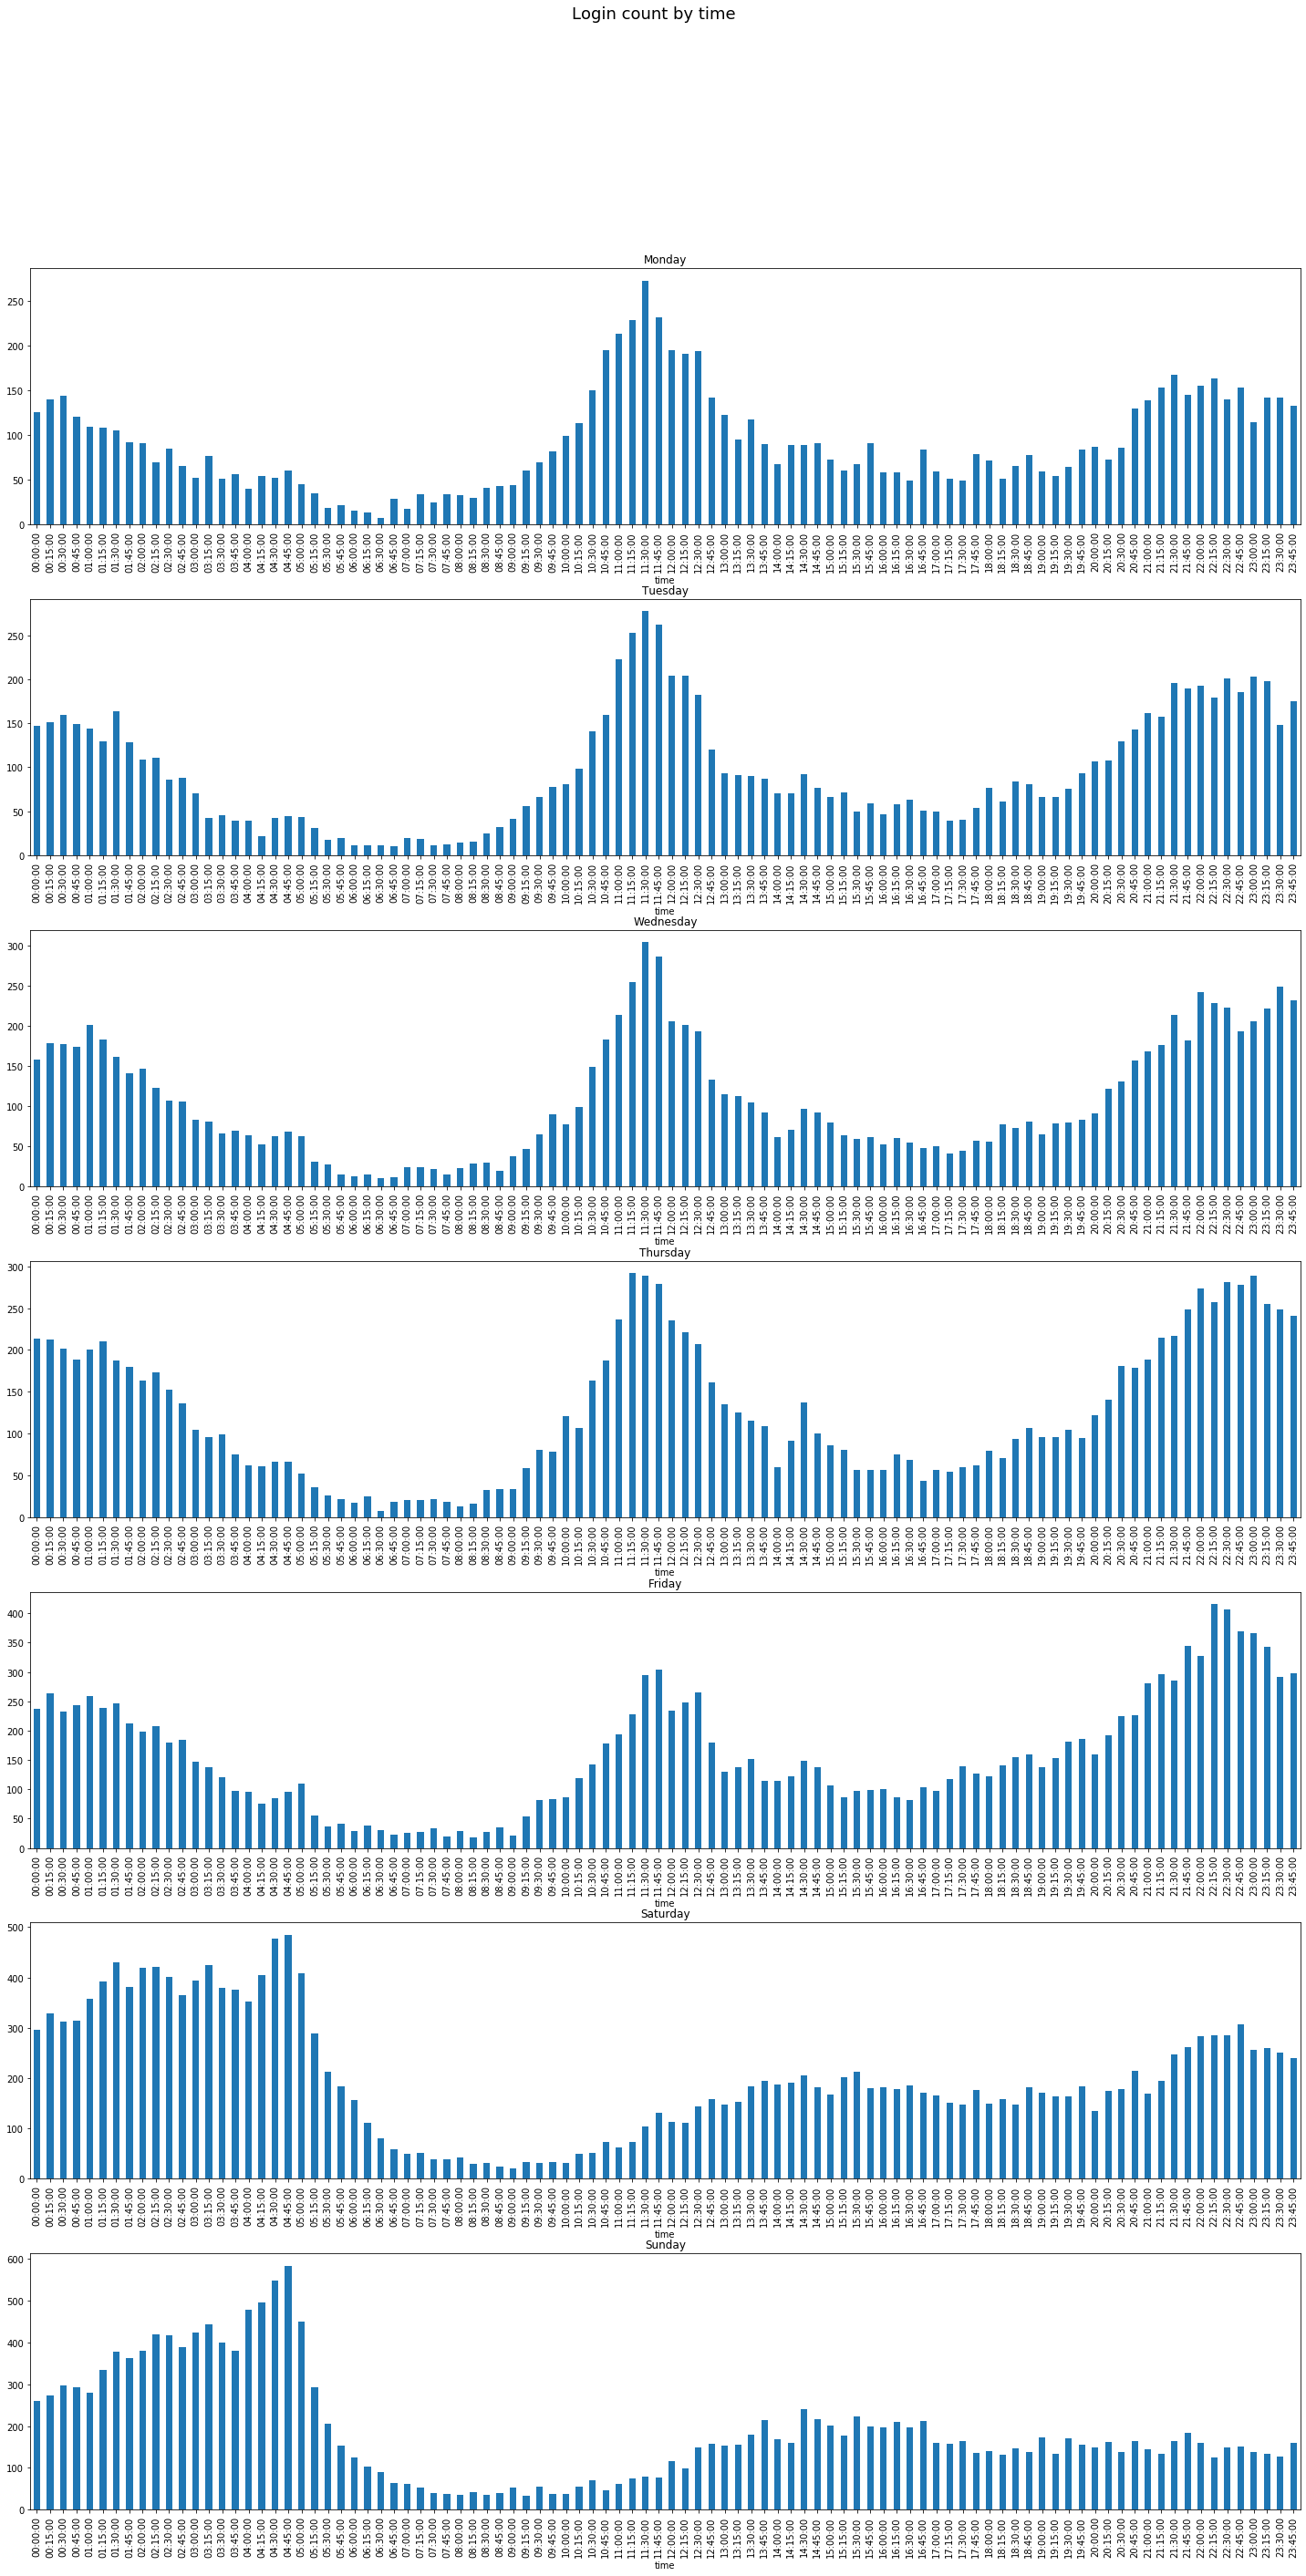

In [97]:
# plot login counts based on a day of the week
fig, axes = plt.subplots(7, 1, figsize=(20, 40))

mon_day = df_agg_15m_2[df_agg_15m_2['weekday_name']=='Monday'].groupby('time')['count'].sum().plot(kind='bar', ax=axes[0])
mon_day.set_title('Monday')
tue_day = df_agg_15m_2[df_agg_15m_2['weekday_name']=='Tuesday'].groupby('time')['count'].sum().plot(kind='bar', ax=axes[1])
tue_day.set_title('Tuesday')
wed_day = df_agg_15m_2[df_agg_15m_2['weekday_name']=='Wednesday'].groupby('time')['count'].sum().plot(kind='bar', ax=axes[2])
wed_day.set_title('Wednesday')
thu_day = df_agg_15m_2[df_agg_15m_2['weekday_name']=='Thursday'].groupby('time')['count'].sum().plot(kind='bar', ax=axes[3])
thu_day.set_title('Thursday')
fri_day = df_agg_15m_2[df_agg_15m_2['weekday_name']=='Friday'].groupby('time')['count'].sum().plot(kind='bar', ax=axes[4])
fri_day.set_title('Friday')
sat_day = df_agg_15m_2[df_agg_15m_2['weekday_name']=='Saturday'].groupby('time')['count'].sum().plot(kind='bar', ax=axes[5])
sat_day.set_title('Saturday')
sun_day = df_agg_15m_2[df_agg_15m_2['weekday_name']=='Sunday'].groupby('time')['count'].sum().plot(kind='bar', ax=axes[6])
sun_day.set_title('Sunday')

fig.suptitle('Login count by time', fontsize=18)
fig.tight_layout()
fig.subplots_adjust(top=0.88)
plt.show()

There are two patterns, one during a weekdays and one during a weekend.